<p>1. Consider any dataset that has more than two class labels. You can create your own or download any publicly available dataset.</p>

<p>(a) First apply PCA and check the performance of the classifier.</p>


<p>(b) Check the performance of the classifier without applying PCA.</p>


<b>used dataset link [MNIST.csv]  (https://drive.google.com/file/d/1C_7cX8PAEI29UDGvrBOVjXUCTXVRz2Bg/view?usp=sharing).

## Importing Libraries

In [17]:
# MNIST dataset downloaded from Kaggle : 
#https://www.kaggle.com/c/digit-recognizer/data

# Functions to read and show images.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, log_loss
from sklearn.linear_model import SGDClassifier
from sklearn.calibration import CalibratedClassifierCV

## Load MNIST Data

In [18]:
url = 'https://drive.google.com/file/d/1C_7cX8PAEI29UDGvrBOVjXUCTXVRz2Bg/view?usp=sharing'
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]

d0 = pd.read_csv(path)

print(d0.head(5)) # print first five rows of d0.

# save the labels into a variable l.
l = d0['label']

# Drop the label feature and store the pixel data in d.
d = d0.drop("label",axis=1)

   label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0         

In [19]:
print(l)

0        1
1        0
2        1
3        4
4        0
        ..
41995    0
41996    1
41997    7
41998    6
41999    9
Name: label, Length: 42000, dtype: int64


In [20]:
print(d.shape)
print(l.shape)

(42000, 784)
(42000,)


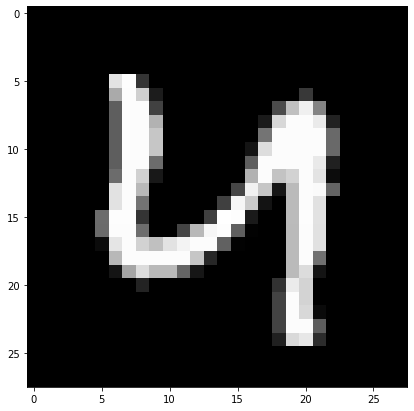

4


In [21]:
# display or plot a number.
plt.figure(figsize=(7,7))
idx = 168

grid_data = d.iloc[idx].to_numpy().reshape(28,28)  # reshape from 1d to 2d pixel array
plt.imshow(grid_data, interpolation = "none", cmap = "gray")
plt.show()

print(l[idx])

In [22]:
labels = l
data = d

print("the shape of sample data = ", data.shape)


the shape of sample data =  (42000, 784)


### Standardizing the train data

In [23]:
# Data-preprocessing: Standardizing the train data

from sklearn.preprocessing import StandardScaler
standardized_data = StandardScaler().fit_transform(data)
print(standardized_data.shape)
print(standardized_data)

(42000, 784)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [24]:
#find the co-variance matrix which is : A^T * A
sample_data = standardized_data

# matrix multiplication using numpy
covar_matrix = np.matmul(sample_data.T , sample_data)

print ( "The shape of co-variance matrix = ", covar_matrix.shape)
print(covar_matrix)

The shape of co-variance matrix =  (784, 784)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


##  a) Apply PCA and check the performance of the classifier

In [25]:
# initializing the pca
from sklearn import decomposition
pca = decomposition.PCA()


In [26]:
# configuring the parameteres
# the number of components = 2
pca.n_components = 2
pca_data = pca.fit_transform(sample_data)

# pca_reduced will contain the 2-d projects of simple data

print("shape of pca_reduced.shape = ", pca_data.shape)


shape of pca_reduced.shape =  (42000, 2)


   1st_principal  2nd_principal  label
0      -5.140507      -5.226576    1.0
1      19.292469       6.034481    0.0
2      -7.644502      -1.705575    1.0
3      -0.474245       5.835838    4.0
4      26.559684       6.025891    0.0


/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


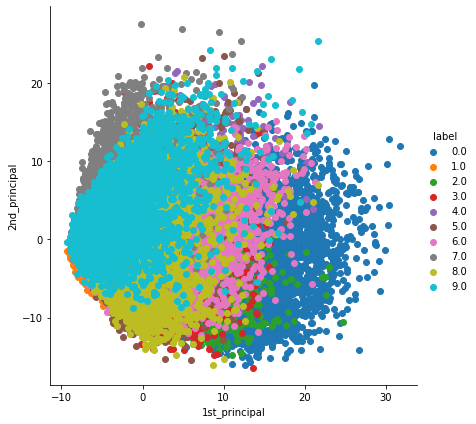

In [27]:
# attaching the label for each 2-d data point 
pca_data = np.vstack((pca_data.T, labels)).T

# creating a new data fram which help us in ploting the result data
pca_df = pd.DataFrame(data=pca_data, columns=("1st_principal", "2nd_principal", "label"))
print(pca_df.head(5))

sn.FacetGrid(pca_df, hue="label", size=6).map(plt.scatter, '1st_principal', '2nd_principal').add_legend()
plt.show()

### Splitting the data into train set  and the test set

In [30]:
X = pca_df.drop('label', axis = 1)
y = pca_df['label']

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=48, stratify=y)

In [41]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(33600, 2) (33600,)
(8400, 2) (8400,)


## Use Logistic Regression

### Hyperparameter tuning

for alpha = 1e-06
Log Loss : 1.8631095011443108
for alpha = 1e-05
Log Loss : 1.8361698639231339
for alpha = 0.0001
Log Loss : 1.8003169334667384
for alpha = 0.001
Log Loss : 1.7909330637318575
for alpha = 0.01
Log Loss : 1.784827980514171
for alpha = 0.1
Log Loss : 1.7844099932086015
for alpha = 1
Log Loss : 1.789881467382765
for alpha = 10
Log Loss : 1.7927342557400048
for alpha = 100
Log Loss : 1.7902624890098193


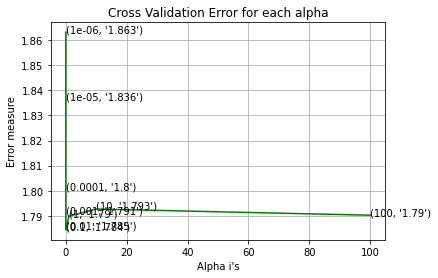

In [32]:
alpha = [10 ** x for x in range(-6, 3)]
cv_log_error_array = []
for i in alpha:
    print("for alpha =", i)
    clf = SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(X_train, y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(X_train, y_train)
    sig_clf_probs = sig_clf.predict_proba(X_train)
    cv_log_error_array.append(log_loss(y_train, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    # to avoid rounding error while multiplying probabilites we use log-probability estimates
    print("Log Loss :",log_loss(y_train, sig_clf_probs)) 

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

In [33]:
best_alpha=alpha[np.argmin(cv_log_error_array)]
best_alpha

0.1

In [36]:
clf = SGDClassifier(alpha=best_alpha, penalty='l2', loss='log', random_state=42)
clf.fit(X_test, y_test) 
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(X_test, y_test)
sig_clf_probs = sig_clf.predict_proba(X_test)
cv_log_error_array.append(log_loss(y_test, sig_clf_probs, labels=clf.classes_, eps=1e-15))
# to avoid rounding error while multiplying probabilites we use log-probability estimates
print("Log Loss :",log_loss(y_test, sig_clf_probs))

Log Loss : 1.7884998973259443


## b) Check the performance of the classifier without applying PCA

### Here dimension of dataset is large, and logistic regression performs well for large dimension dataset

### Splitting the data into train set  and the test set

In [42]:
X = data
y = labels

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=48, stratify=y)

In [43]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(33600, 784) (33600,)
(8400, 784) (8400,)


## Use Logistic Regression

### Hyperparameter tuning

for alpha = 1e-06
Log Loss : 2.3011609502432373
for alpha = 1e-05
Log Loss : 2.3011609502432373
for alpha = 0.0001
Log Loss : 0.8280966878599159
for alpha = 0.001
Log Loss : 0.3454734044841442
for alpha = 0.01
Log Loss : 0.34600472818986805
for alpha = 0.1
Log Loss : 0.3393379391317211
for alpha = 1
Log Loss : 0.32534354408789173
for alpha = 10
Log Loss : 0.3377813894189062
for alpha = 100
Log Loss : 0.3816698264576704


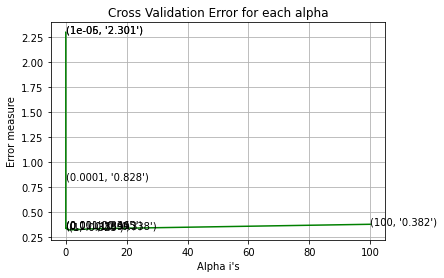

In [45]:
alpha = [10 ** x for x in range(-6, 3)]
cv_log_error_array = []
for i in alpha:
    print("for alpha =", i)
    clf = SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(X_train, y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(X_train, y_train)
    sig_clf_probs = sig_clf.predict_proba(X_train)
    cv_log_error_array.append(log_loss(y_train, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    # to avoid rounding error while multiplying probabilites we use log-probability estimates
    print("Log Loss :",log_loss(y_train, sig_clf_probs)) 

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

In [46]:
best_alpha=alpha[np.argmin(cv_log_error_array)]
best_alpha

1

In [47]:
clf = SGDClassifier(alpha=best_alpha, penalty='l2', loss='log', random_state=42)
clf.fit(X_test, y_test) 
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(X_test, y_test)
sig_clf_probs = sig_clf.predict_proba(X_test)
cv_log_error_array.append(log_loss(y_test, sig_clf_probs, labels=clf.classes_, eps=1e-15))
# to avoid rounding error while multiplying probabilites we use log-probability estimates
print("Log Loss :",log_loss(y_test, sig_clf_probs))

Log Loss : 0.31503489064282825


## Conclusion:
### i) Logistic Regression with appling PCA
Logloss: 1.7884998973259443 (consider 2 Dimension, i.e pca.n_components = 2)

### ii) Logistic Regression without appling PCA
Logloss: 0.31503489064282825 (consider 784 Dimension)
